In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Copper_Set_Result.csv")

In [4]:
for i in list(df.columns):
    print(f"{i}:{df[i].nunique()}")
    df.dtypes

id:8432
item_date:12
quantity tons:8433
customer:424
country:15
status:8
item type:5
application:24
thickness:290
width:655
material_ref:2202
product_ref:23
delivery date:14
selling_price:1296


In [5]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['item_date_1'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date_1'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df.head(3)
df.isnull().sum()

,0
id,1
item_date,0
quantity tons,0
customer,1
country,1
status,1
item type,1
application,1
thickness,1
width,1


In [6]:
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.head(3)
df.isnull().sum()

,0
id,1
item_date,0
quantity tons,0
customer,1
country,1
status,1
item type,1
application,1
thickness,1
width,1


In [7]:
df.drop(columns=['id','material_ref'], inplace=True)
df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,8433.0,2.021030e+07,2.834965e+03,1.995000e+07,2.021032e+07,2.021032e+07,2.021033e+07,2.021040e+07
quantity tons,8433.0,1.123660e+02,5.217042e+02,2.147263e-02,1.645895e+01,3.393732e+01,8.208732e+01,2.030029e+04
customer,8432.0,3.023810e+07,7.125830e+04,3.014772e+07,3.019799e+07,3.020582e+07,3.028401e+07,3.040772e+07
country,8432.0,4.090074e+01,2.268432e+01,2.500000e+01,2.600000e+01,2.800000e+01,7.700000e+01,1.130000e+02
application,8432.0,2.811053e+01,1.815966e+01,2.000000e+00,1.000000e+01,2.600000e+01,4.100000e+01,9.900000e+01
thickness,8432.0,2.869824e+00,2.732379e+01,1.800000e-01,7.500000e-01,1.800000e+00,3.000000e+00,2.500000e+03
width,8432.0,1.296624e+03,2.396125e+02,1.000000e+00,1.167750e+03,1.250000e+03,1.500000e+03,2.150000e+03
product_ref,8432.0,5.191926e+08,7.410705e+08,6.119930e+05,6.283770e+05,6.406650e+05,1.668702e+09,1.693868e+09
delivery date,8432.0,2.021185e+07,1.099854e+05,2.020070e+07,2.021050e+07,2.021070e+07,2.021080e+07,3.031010e+07
selling_price,8432.0,1.034689e+03,2.232278e+02,-1.160000e+03,9.118700e+02,1.023000e+03,1.158000e+03,2.133000e+03


In [8]:
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T
df.isnull().sum()

,0
item_date,0
quantity tons,0
customer,1
country,1
status,1
item type,1
application,1
thickness,1
width,1
product_ref,1


In [9]:
df['item_date'].fillna(df['item_date'].mode().iloc[0], inplace=True)
df['item_date_1'].fillna(df['item_date_1'].mode().iloc[0], inplace=True)
df['status'].fillna(df['status'].mode().iloc[0], inplace=True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0], inplace=True)
df['delivery date_1'].fillna(df['delivery date_1'].mode().iloc[0], inplace=True)

In [10]:
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
df['customer'].fillna(df['customer'].median(), inplace=True)
df['country'].fillna(df['country'].median(), inplace=True)
df['application'].fillna(df['application'].median(), inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

In [11]:
df.isnull().sum()
df['status'].unique()
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', nan], dtype=object)

In [12]:
df['status'] = df['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4, 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])

In [13]:
df['item type'].unique()
df.isnull().sum()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,8433.0,2.021030e+07,2.834965e+03,1.995000e+07,2.021032e+07,2.021032e+07,2.021033e+07,2.021040e+07
quantity tons,8433.0,1.123660e+02,5.217042e+02,2.147263e-02,1.645895e+01,3.393732e+01,8.208732e+01,2.030029e+04
customer,8433.0,3.023810e+07,7.125494e+04,3.014772e+07,3.019799e+07,3.020582e+07,3.028392e+07,3.040772e+07
country,8433.0,4.089921e+01,2.268341e+01,2.500000e+01,2.600000e+01,2.800000e+01,7.700000e+01,1.130000e+02
status,8433.0,1.263489e+00,1.196756e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00
item type,8432.0,2.579103e+00,6.297151e-01,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
application,8433.0,2.811028e+01,1.815859e+01,2.000000e+00,1.000000e+01,2.600000e+01,4.100000e+01,9.900000e+01
thickness,8433.0,2.869697e+00,2.732217e+01,1.800000e-01,7.500000e-01,1.800000e+00,3.000000e+00,2.500000e+03
width,8432.0,1.296624e+03,2.396125e+02,1.000000e+00,1.167750e+03,1.250000e+03,1.500000e+03,2.150000e+03
product_ref,8432.0,5.191926e+08,7.410705e+08,6.119930e+05,6.283770e+05,6.406650e+05,1.668702e+09,1.693868e+09


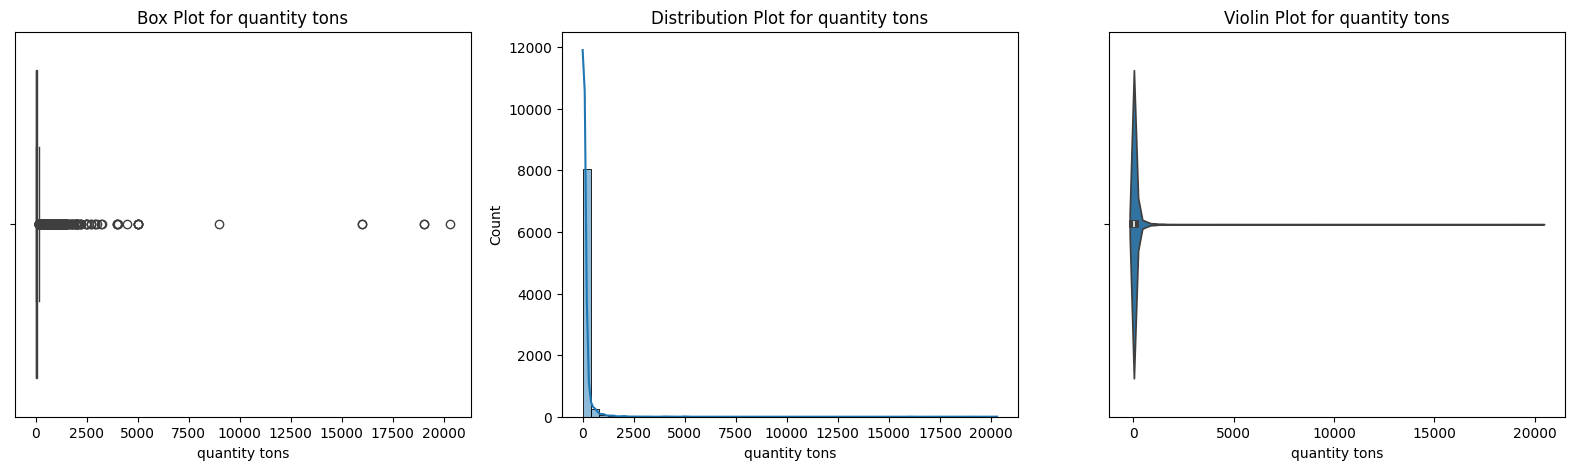

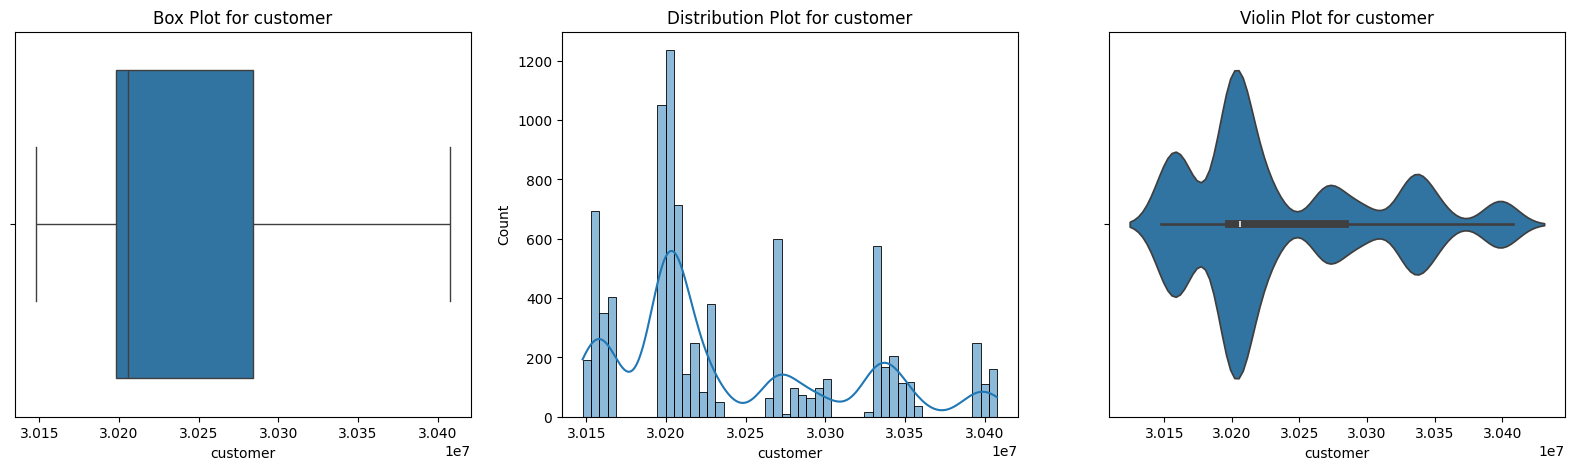

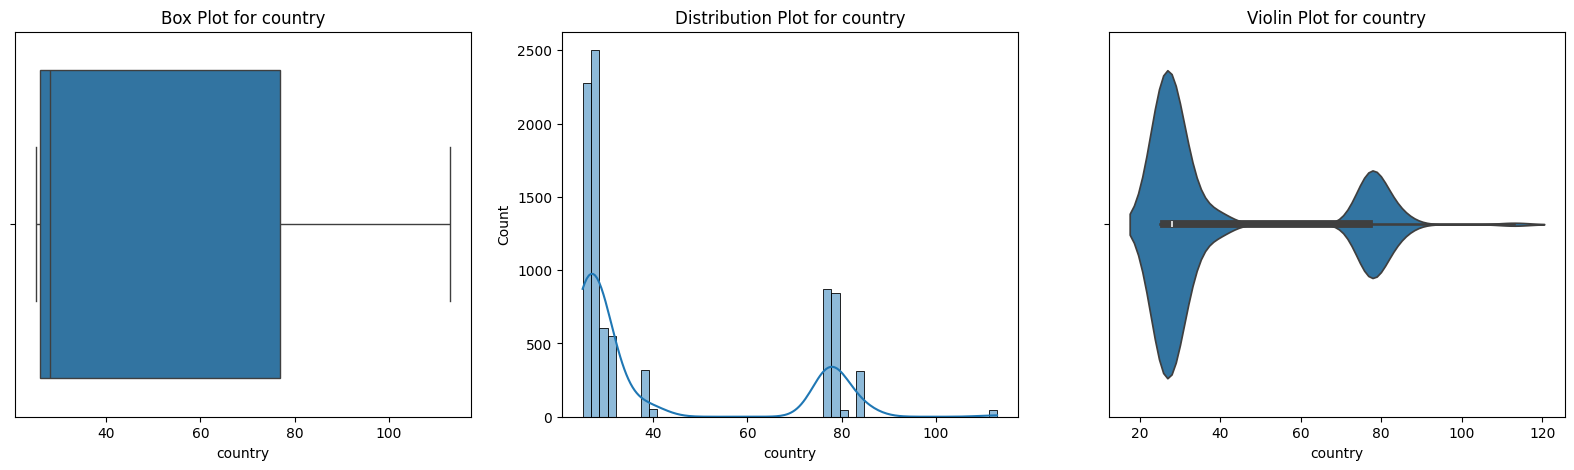

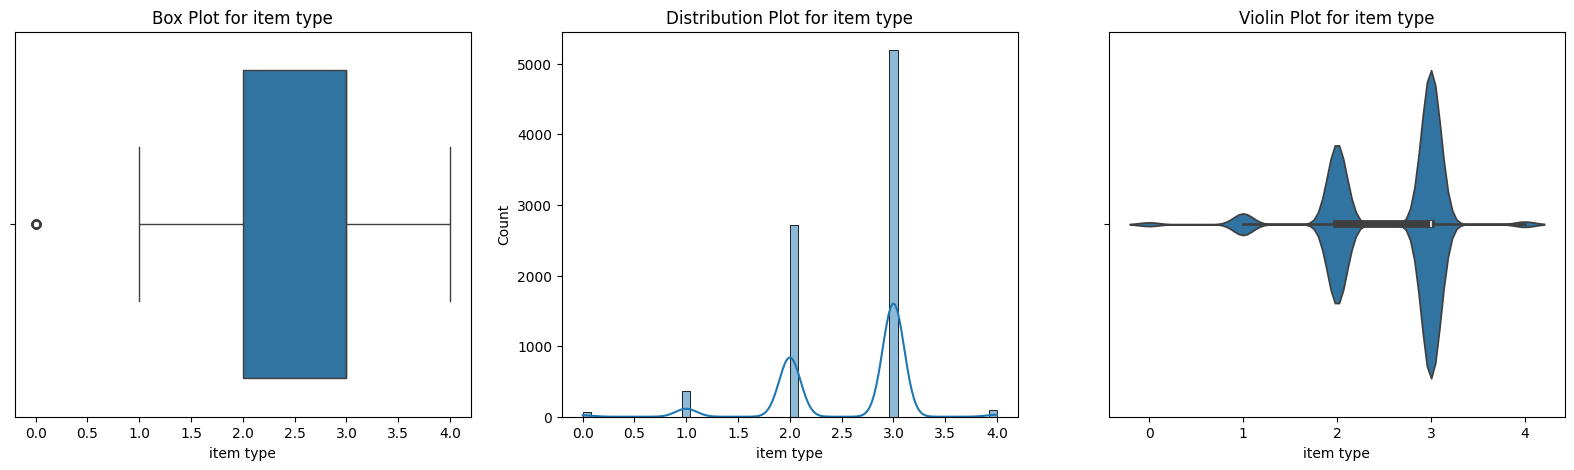

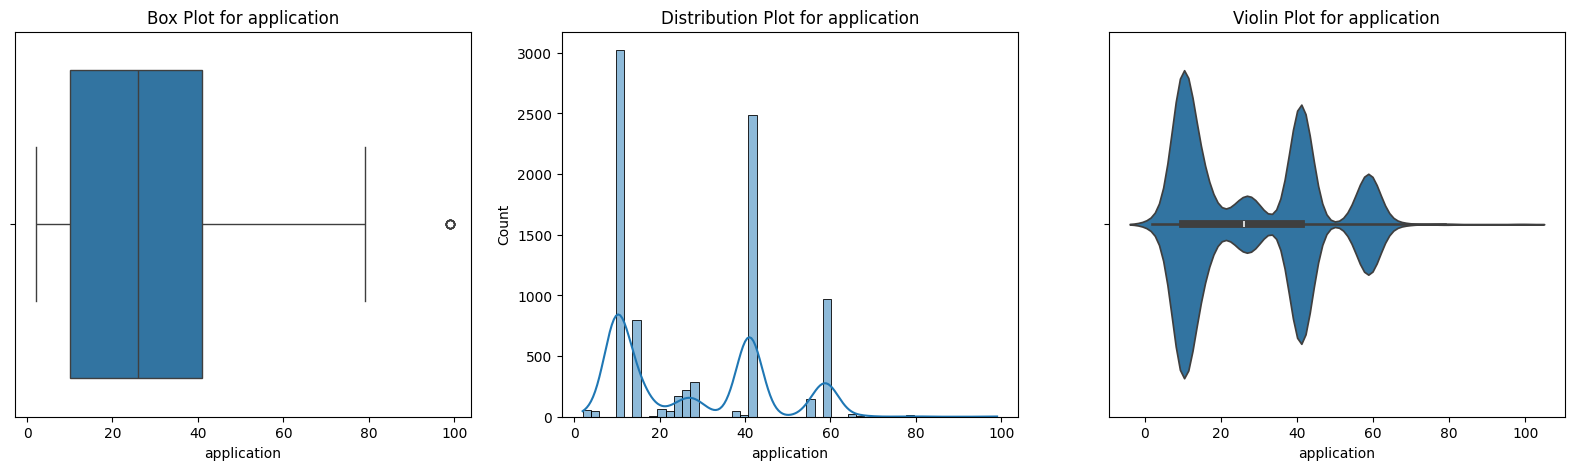

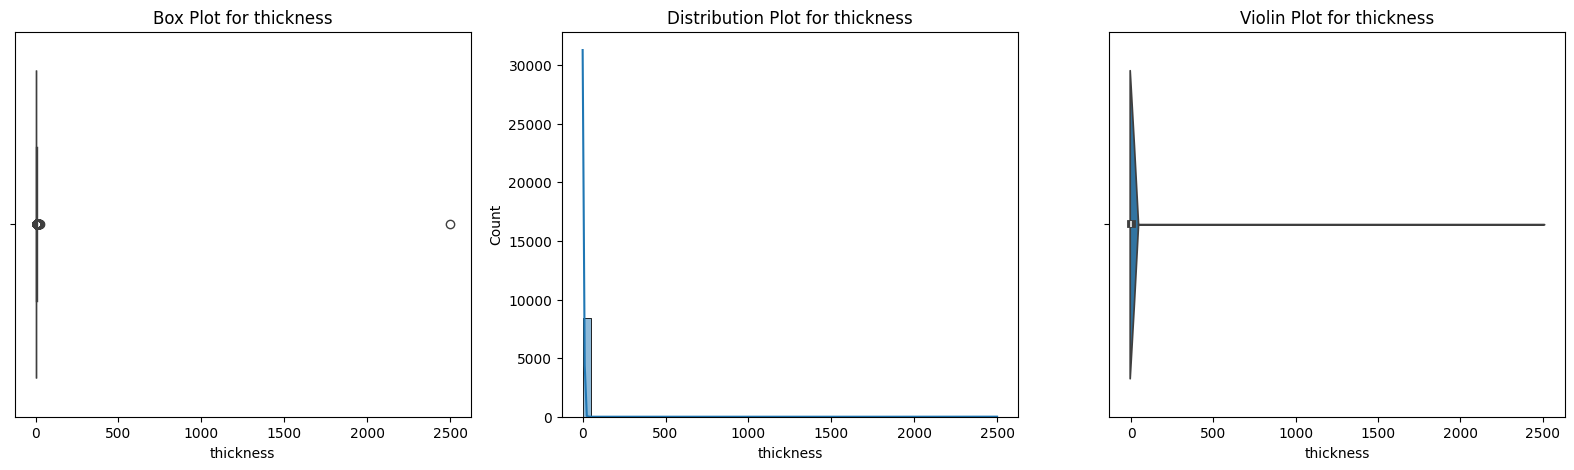

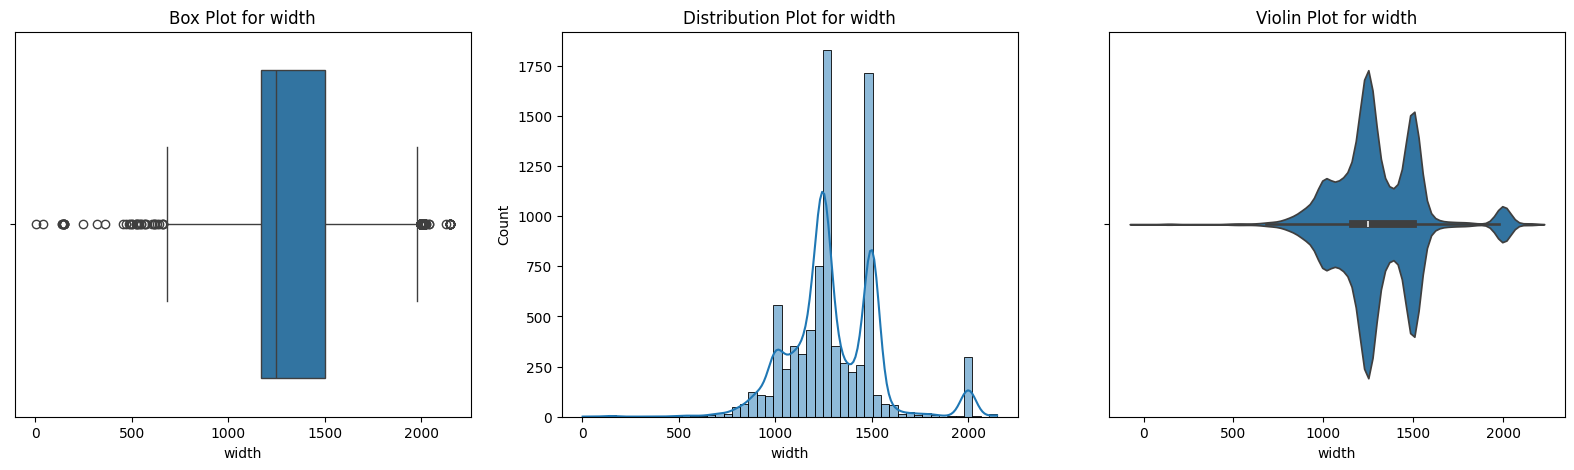

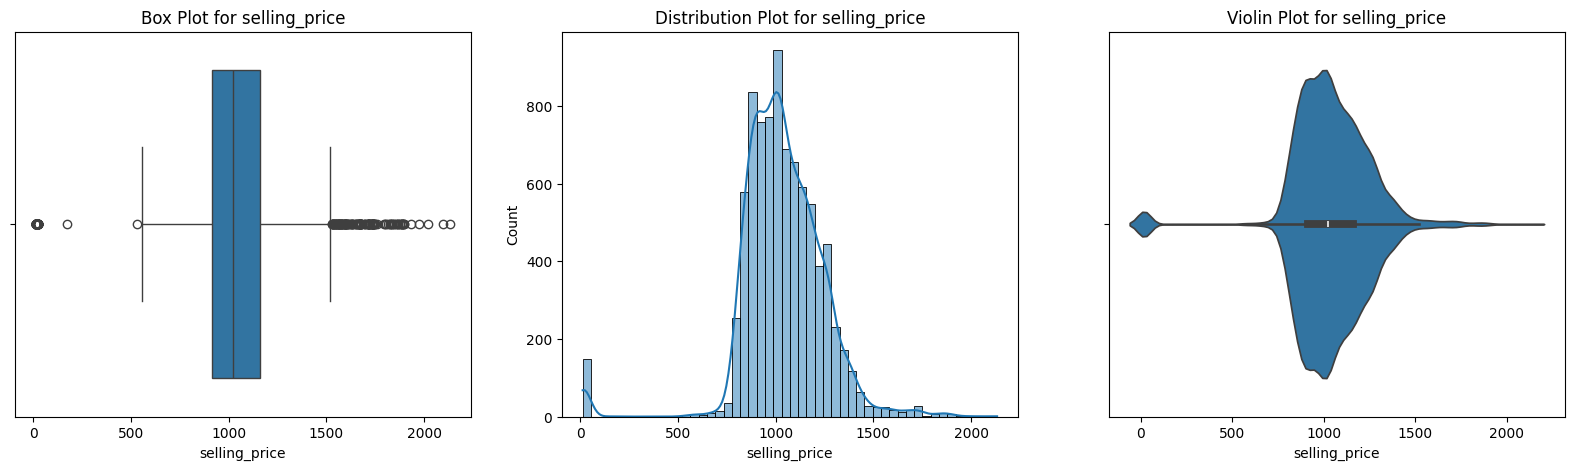

In [14]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()
for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [15]:
df1 = df.copy()
df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])


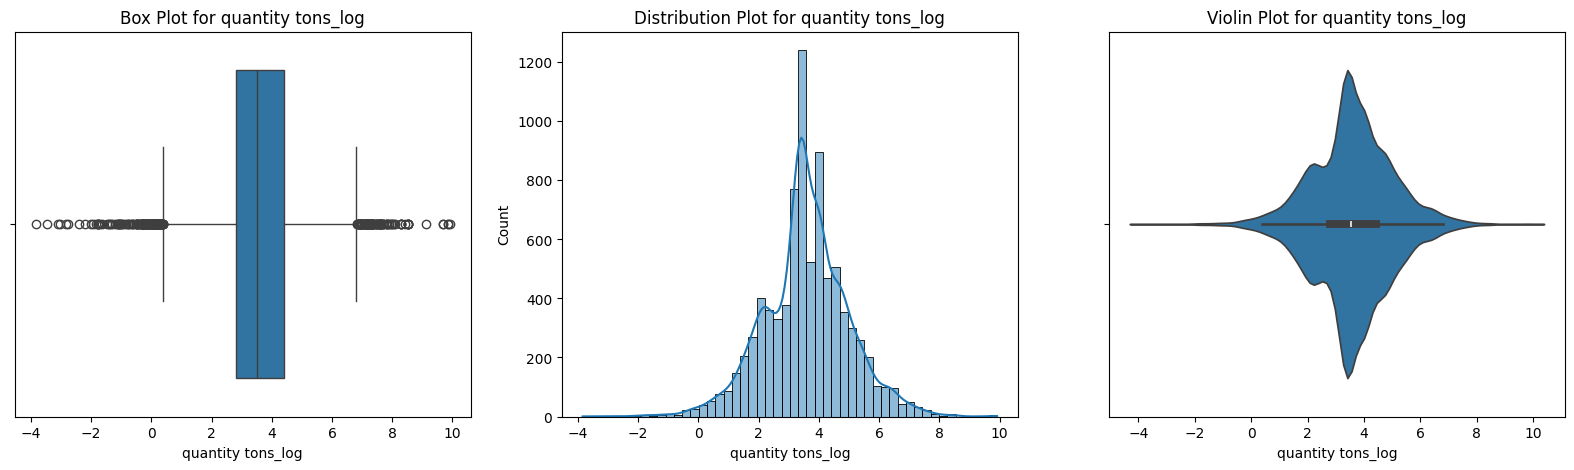

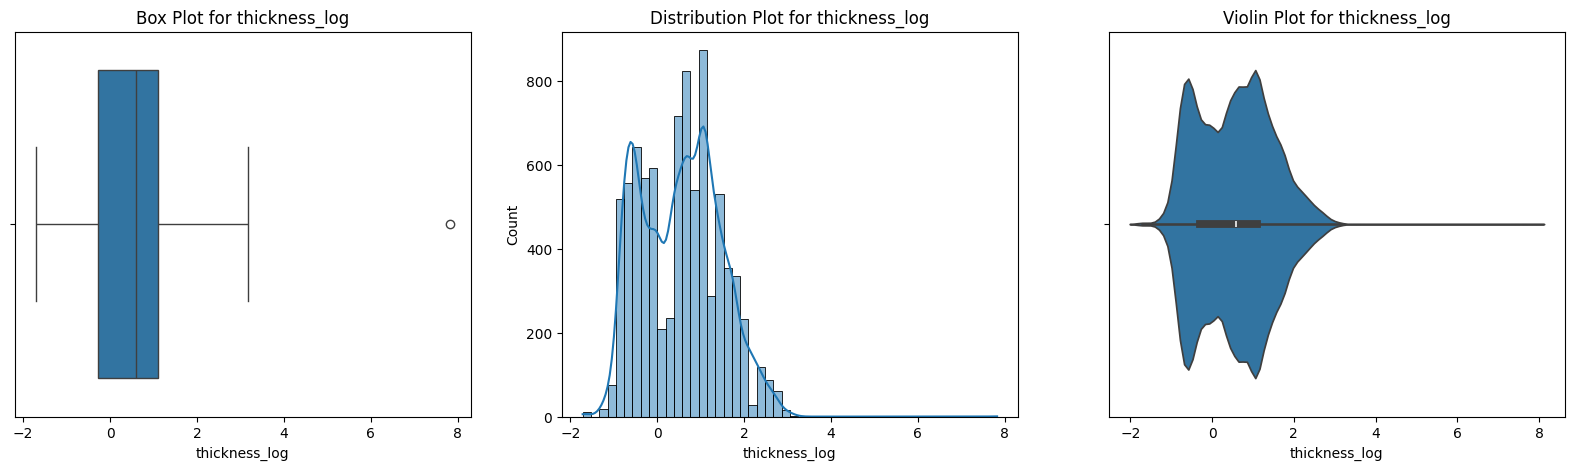

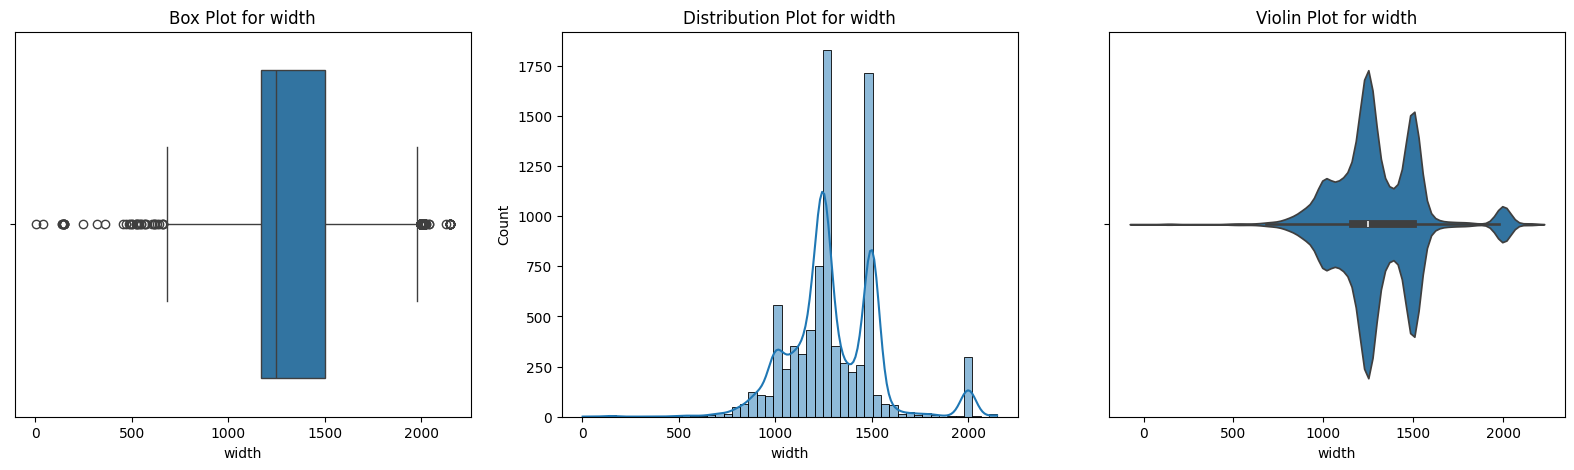

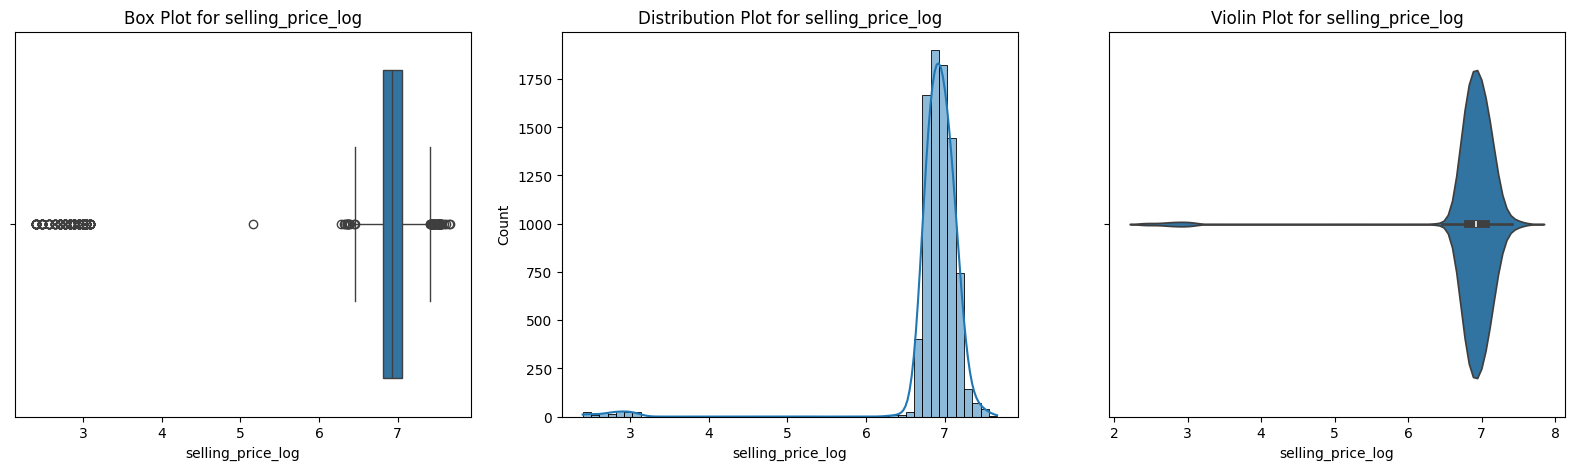

In [16]:
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)
df2 = df1.copy()

In [17]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

outlier(df2, 'quantity tons_log')
outlier(df2, 'thickness_log')
outlier(df2, 'selling_price_log')
outlier(df2, 'width')

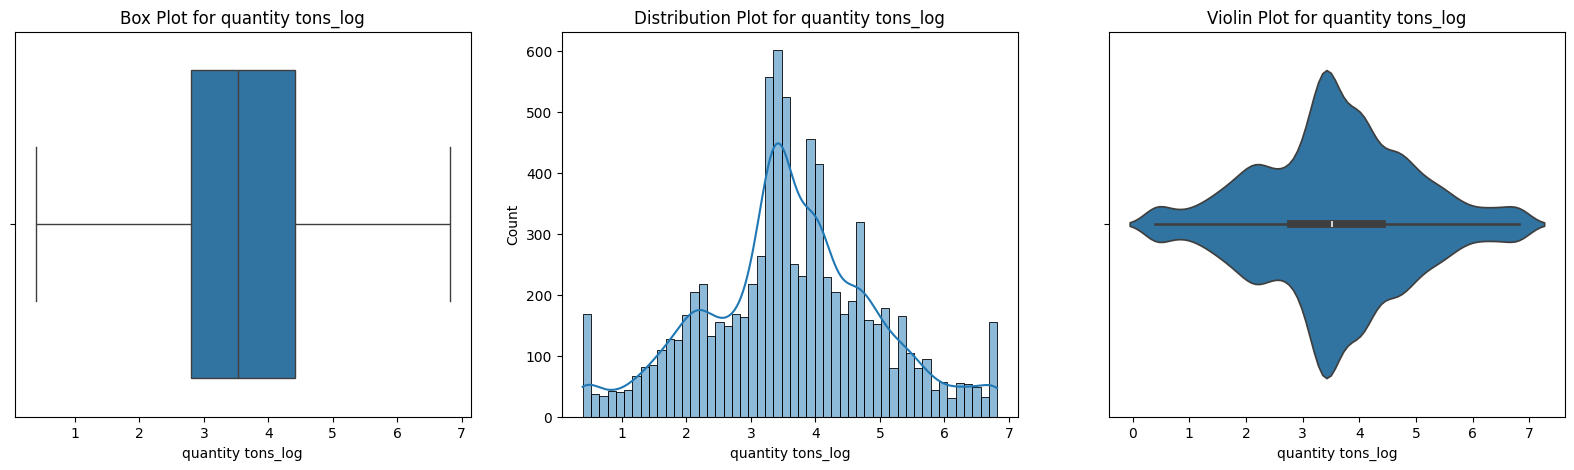

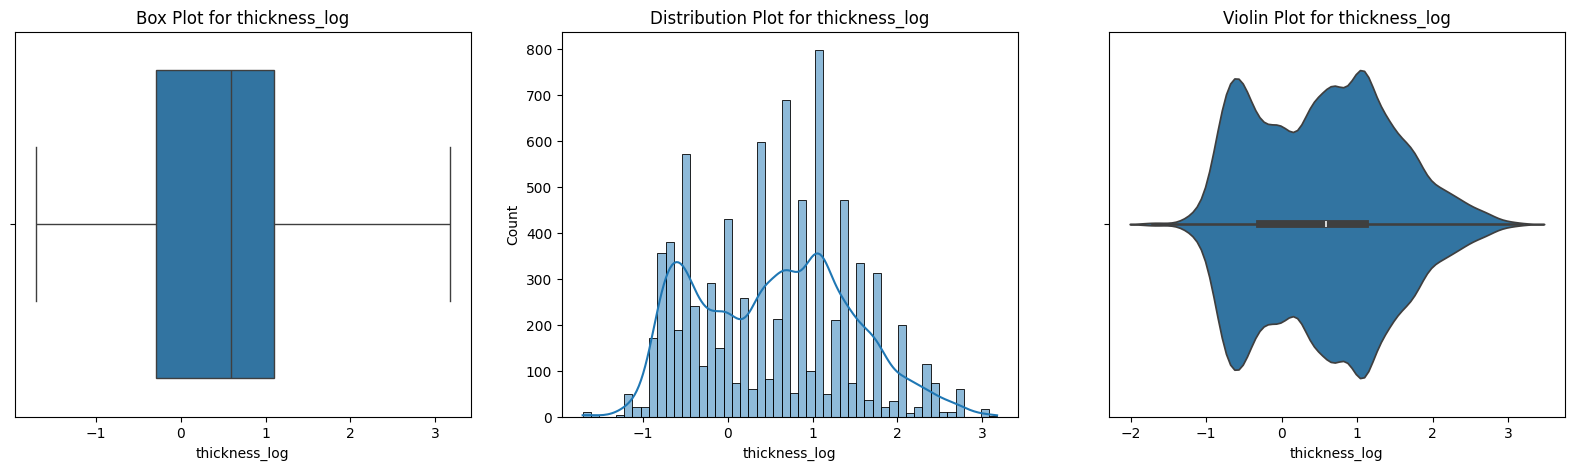

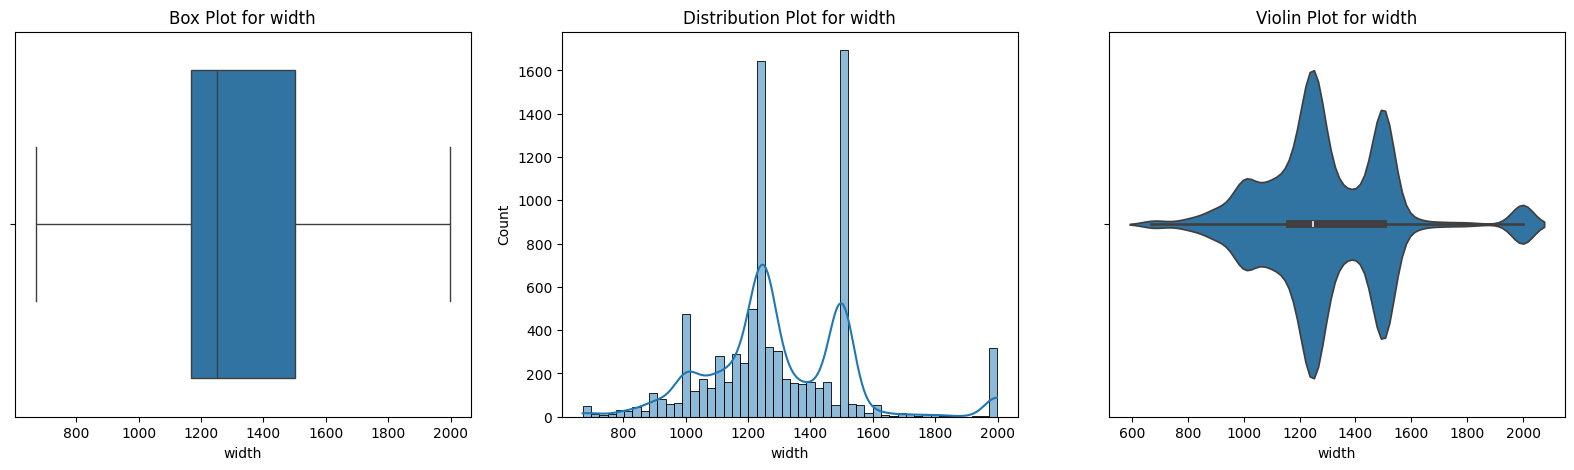

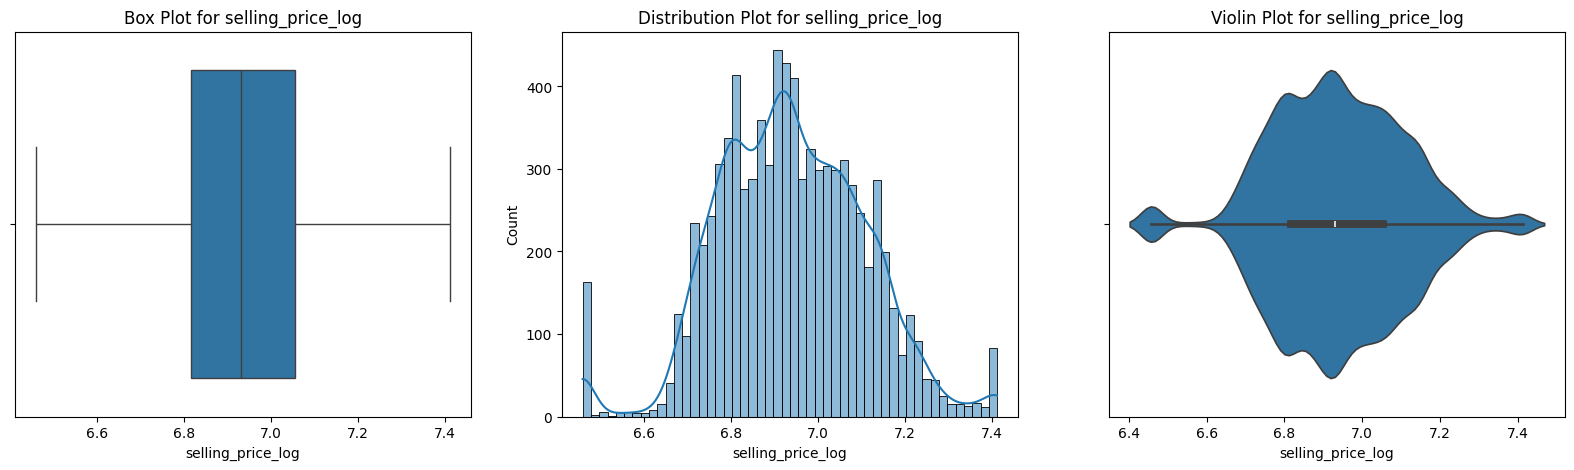

,count,mean,std,min,25%,50%,75%,max
item_date,8433.0,2.021030e+07,2.834965e+03,1.995000e+07,2.021032e+07,2.021032e+07,2.021033e+07,2.021040e+07
quantity tons,8433.0,1.123660e+02,5.217042e+02,2.147263e-02,1.645895e+01,3.393732e+01,8.208732e+01,2.030029e+04
customer,8433.0,3.023810e+07,7.125494e+04,3.014772e+07,3.019799e+07,3.020582e+07,3.028392e+07,3.040772e+07
country,8433.0,4.089921e+01,2.268341e+01,2.500000e+01,2.600000e+01,2.800000e+01,7.700000e+01,1.130000e+02
status,8433.0,1.263489e+00,1.196756e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00
item type,8432.0,2.579103e+00,6.297151e-01,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
application,8433.0,2.811028e+01,1.815859e+01,2.000000e+00,1.000000e+01,2.600000e+01,4.100000e+01,9.900000e+01
thickness,8433.0,2.869697e+00,2.732217e+01,1.800000e-01,7.500000e-01,1.800000e+00,3.000000e+00,2.500000e+03
width,8432.0,1.297361e+03,2.345841e+02,6.693750e+02,1.167750e+03,1.250000e+03,1.500000e+03,1.998375e+03
product_ref,8432.0,5.191926e+08,7.410705e+08,6.119930e+05,6.283770e+05,6.406650e+05,1.668702e+09,1.693868e+09


In [18]:
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df2, i)
df2.describe().T

In [19]:
df3 = df2.drop(columns=['quantity tons', 'thickness', 'selling_price'])
df3.dtypes

,0
item_date,int64
customer,float64
country,float64
status,int64
item type,float64
application,float64
width,float64
product_ref,float64
delivery date,float64
item_date_1,object


In [20]:
col = ['quantity tons_log','customer','country','status','application','width','product_ref','thickness_log','selling_price_log']
df_corelation = df3[col].corr()
df4 = df3.copy()
df_corelation

,quantity tons_log,customer,country,status,application,width,product_ref,thickness_log,selling_price_log
quantity tons_log,1.000000,-0.015096,-0.046387,0.004449,0.022270,0.020232,0.105307,0.116404,-0.121324
customer,-0.015096,1.000000,0.412315,0.073705,-0.062575,0.169842,-0.075843,0.229772,-0.076055
country,-0.046387,0.412315,1.000000,-0.069563,-0.082715,0.091213,-0.189839,0.131856,-0.099075
status,0.004449,0.073705,-0.069563,1.000000,0.029775,-0.054274,0.014948,-0.041840,0.004053
application,0.022270,-0.062575,-0.082715,0.029775,1.000000,-0.172225,-0.170329,-0.087947,0.032099
width,0.020232,0.169842,0.091213,-0.054274,-0.172225,1.000000,-0.006367,0.409525,-0.230335
product_ref,0.105307,-0.075843,-0.189839,0.014948,-0.170329,-0.006367,1.000000,0.190349,-0.037302
thickness_log,0.116404,0.229772,0.131856,-0.041840,-0.087947,0.409525,0.190349,1.000000,-0.552769
selling_price_log,-0.121324,-0.076055,-0.099075,0.004053,0.032099,-0.230335,-0.037302,-0.552769,1.000000


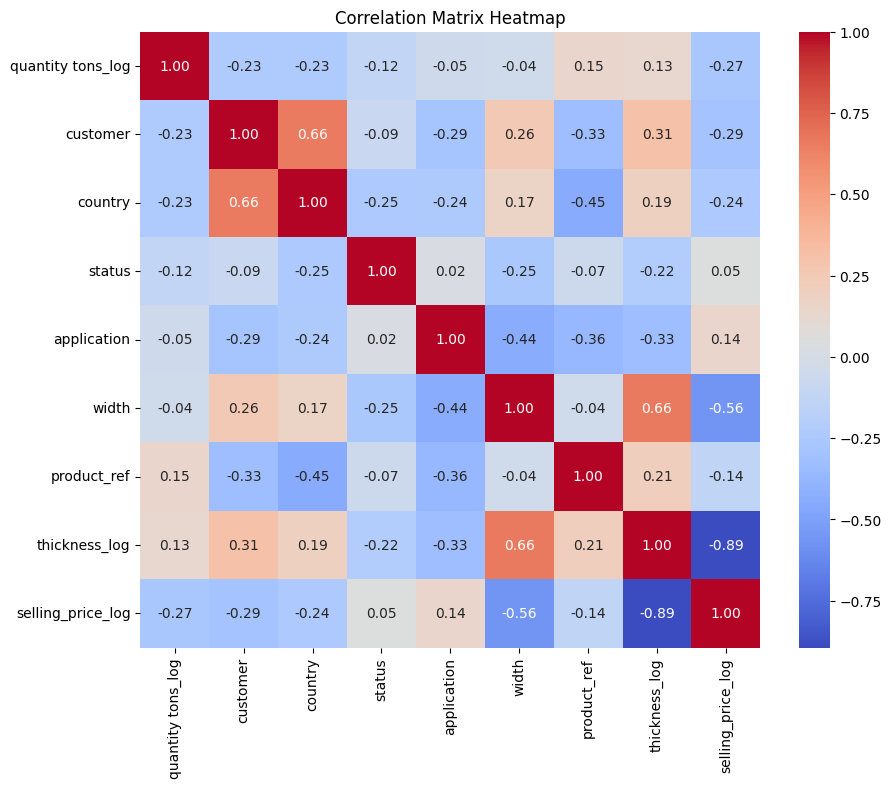

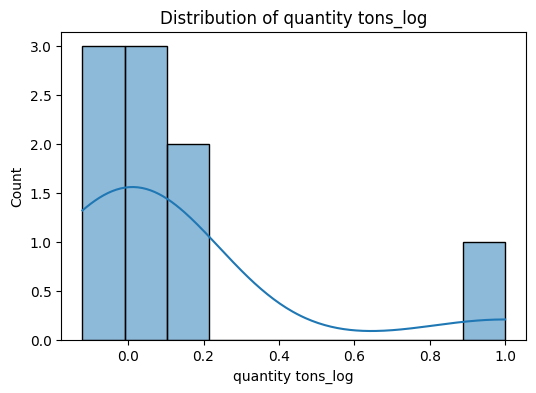

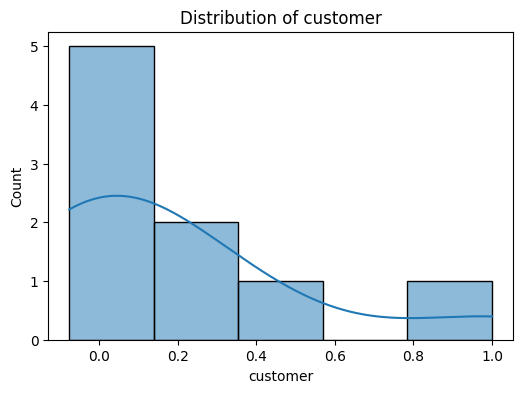

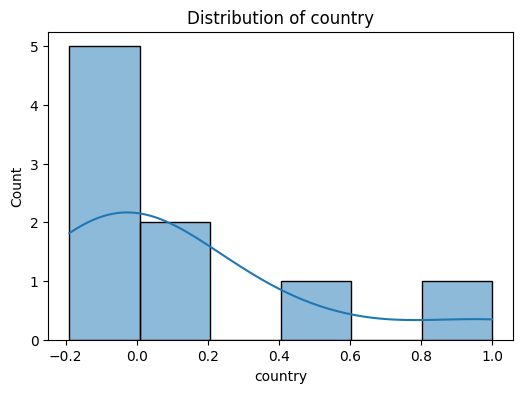

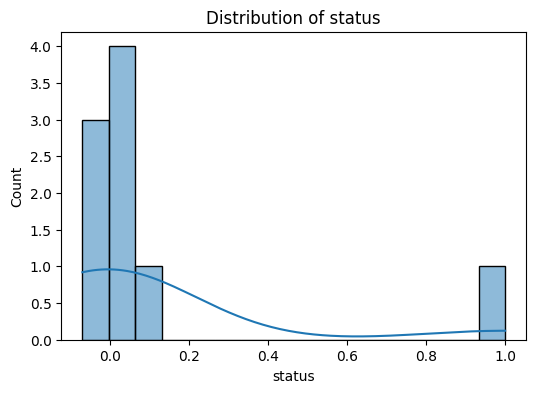

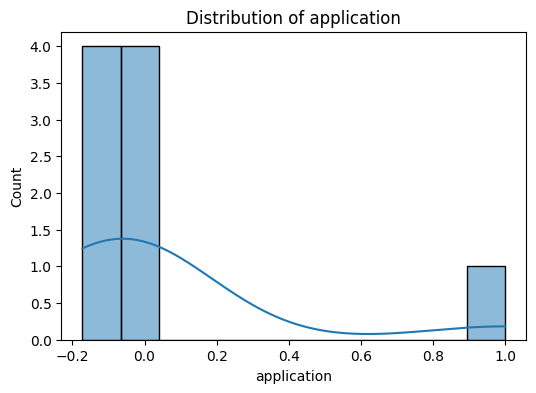

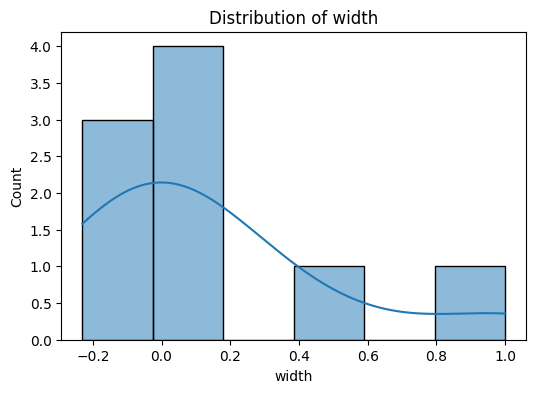

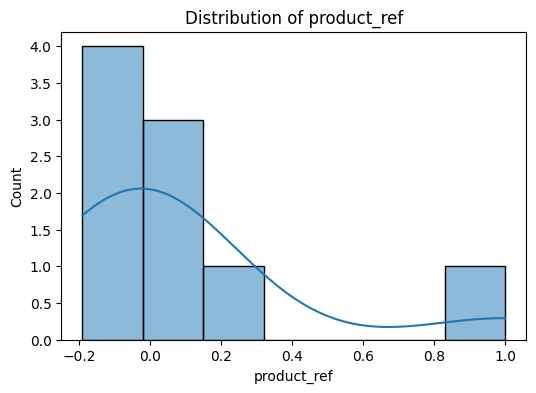

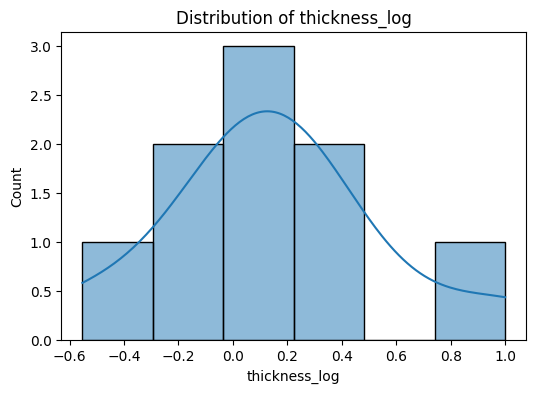

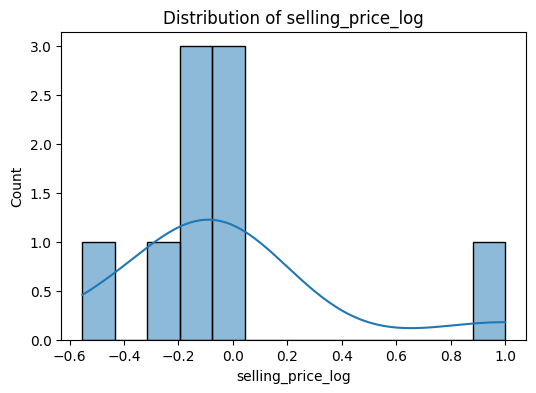

<Figure size 600x400 with 0 Axes>

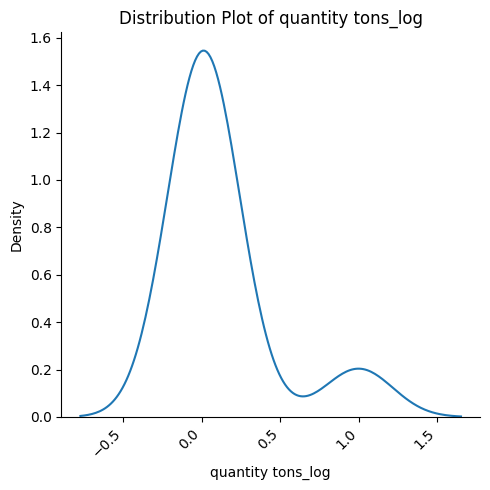

<Figure size 600x400 with 0 Axes>

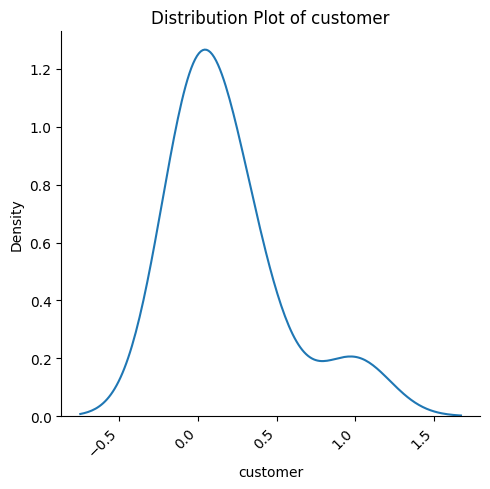

<Figure size 600x400 with 0 Axes>

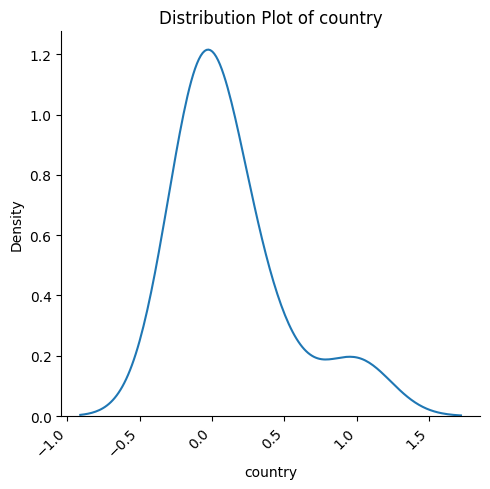

<Figure size 600x400 with 0 Axes>

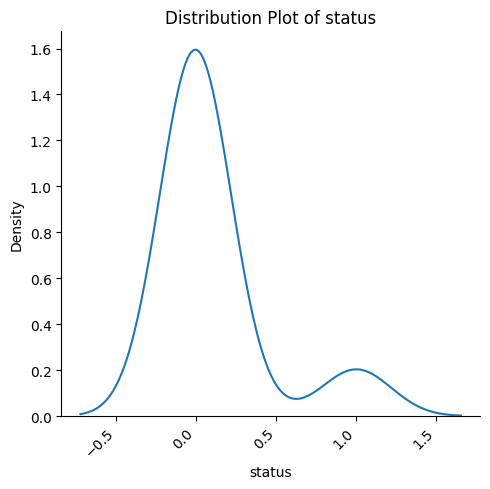

<Figure size 600x400 with 0 Axes>

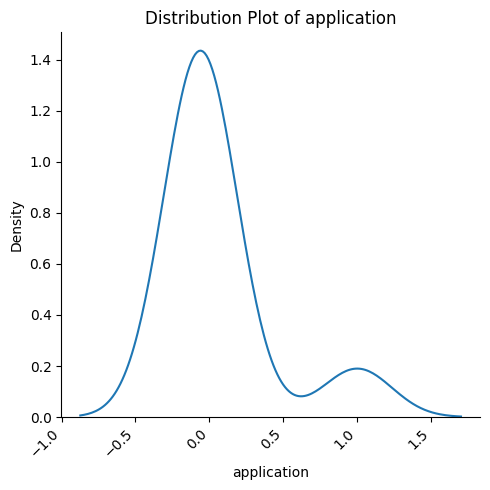

<Figure size 600x400 with 0 Axes>

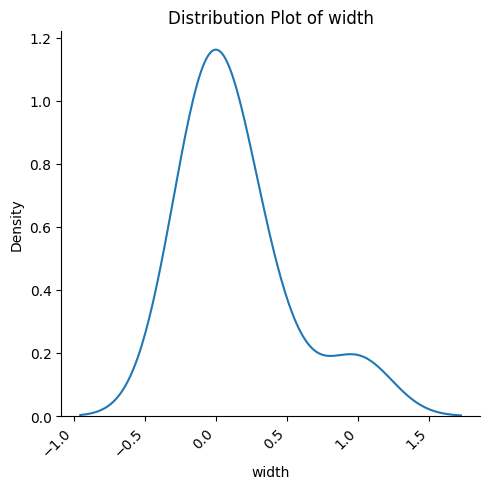

<Figure size 600x400 with 0 Axes>

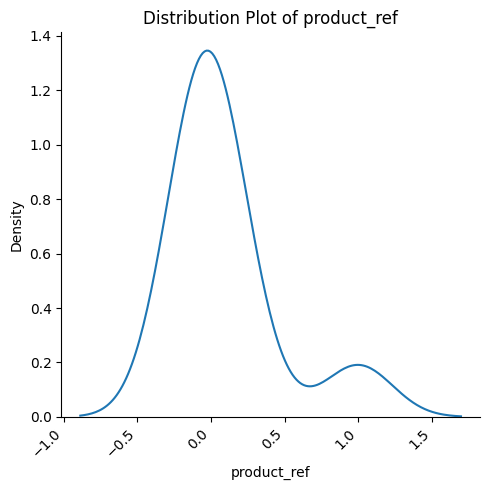

<Figure size 600x400 with 0 Axes>

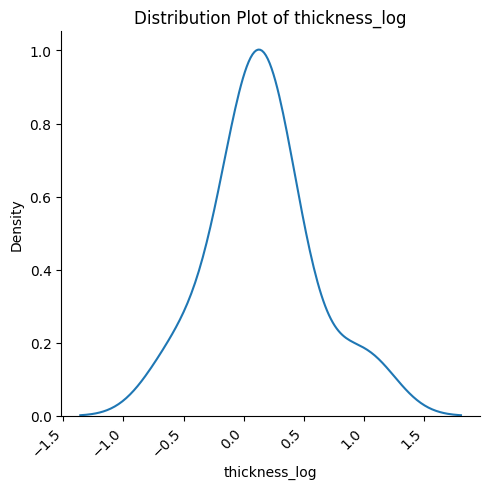

<Figure size 600x400 with 0 Axes>

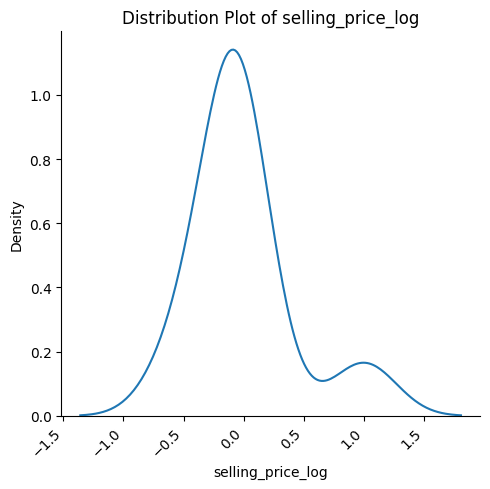

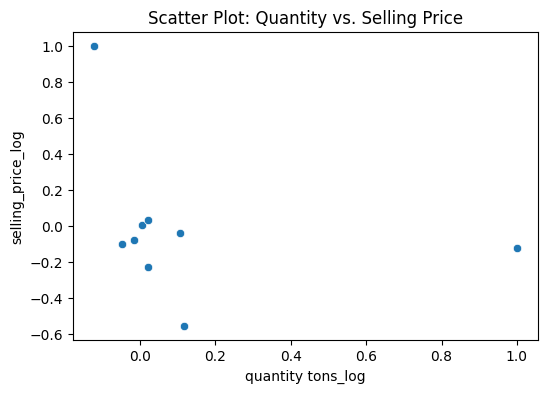

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corelation.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

for column in df_corelation.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_corelation[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

for column in df_corelation.columns:
    plt.figure(figsize=(6, 4))
    sns.displot(x=column, data=df_corelation, kind='kde')

    plt.title(f'Distribution Plot of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='quantity tons_log', y='selling_price_log', data=df_corelation)
plt.title('Scatter Plot: Quantity vs. Selling Price')
plt.show()


In [22]:
df4['Date_difference'] = (df4['delivery date_1'] - df4['item_date_1']).apply(lambda x: x.days)
df4.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference
0,20210401,30156308.0,28.0,1,3.0,10.0,1500.000,1.670799e+09,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91
1,20210401,30202938.0,25.0,1,3.0,41.0,1210.000,1.668702e+09,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0
2,20210401,30153963.0,30.0,1,4.0,28.0,952.000,6.283770e+05,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90
3,20210401,30349574.0,32.0,1,2.0,59.0,1317.000,1.668702e+09,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90
4,20210401,30211560.0,28.0,1,3.0,10.0,1998.375,6.406650e+05,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.457425,-31


In [24]:
df4['item_date_1'] = pd.to_datetime(df4['item_date_1'])
df4['item_date_day'] = df4['item_date_1'].dt.day
df4['item_date_month'] = df4['item_date_1'].dt.month
df4['item_date_year'] = df4['item_date_1'].dt.year

In [25]:
df_f1 = df4[df4['Date_difference']>=0]
df_f1 = df_f1.reset_index(drop=True)
df_f2 = df4[df4['Date_difference']<0]
df_f2 = df_f2.reset_index(drop=True)


In [26]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
df_f1.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date', 'item_date_1',
       'delivery date_1', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'Date_difference', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [27]:
def machine_learning_delivery_date(df, algorithm):

    x = df.drop(columns=['item_date_1', 'delivery date_1', 'Date_difference'], axis=1)
    y = df['Date_difference']

    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')
    x = imputer.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    model = algorithm().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {'Algorithm': str(algorithm).split("'")[1].split(".")[-1],
               'R2': r2,
               'Mean Absolute Error': mae,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}

    return metrics

In [28]:
print(machine_learning_delivery_date(df_f1, DecisionTreeRegressor))
print(machine_learning_delivery_date(df_f1, RandomForestRegressor))
print(machine_learning_delivery_date(df_f1, AdaBoostRegressor))
print(machine_learning_delivery_date(df_f1, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2': 0.9999997381393317, 'Mean Absolute Error': 0.0006013229104028864, 'Mean Squared Error': 0.0006013229104028864, 'Root Mean Squared Error': np.float64(0.024521886354905213)}
{'Algorithm': 'RandomForestRegressor', 'R2': 0.9999533576452809, 'Mean Absolute Error': 0.01140108238123875, 'Mean Squared Error': 0.1097886951292847, 'Root Mean Squared Error': np.float64(0.3313437718281192)}
{'Algorithm': 'AdaBoostRegressor', 'R2': 0.990917514549625, 'Mean Absolute Error': 3.4674969367231934, 'Mean Squared Error': 19.78124502799519, 'Root Mean Squared Error': np.float64(4.447611159712053)}
{'Algorithm': 'XGBRegressor', 'R2': 0.9999969601631165, 'Mean Absolute Error': 0.004729470703750849, 'Mean Squared Error': 0.00674860505387187, 'Root Mean Squared Error': np.float64(0.08214989381534142)}


In [29]:
def machine_learning_delivery_date(df, algorithm):
  model = RandomForestRegressor().fit(
      df_f1.drop(columns=['item_date_1', 'delivery date_1', 'Date_difference'], axis=1),
      df_f1['Date_difference']
  )
  return model

model = machine_learning_delivery_date(df_f1, RandomForestRegressor)

user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1, 4, 2021, 1, 1, 2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Lose
